In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Problem 1

In [12]:
#spearman = 1
#pearson < 0.5
# делаем нелинейную зависимость

s = np.array([i for i in range(100)])
s1 = np.e **s

In [16]:
s[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
s1[:10]

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [15]:
print('Pearson:', pearsonr(s, s1)[0])
print('Spearman: ', spearmanr(s, s1)[0])

Pearson: 0.2520320339038703
Spearman:  0.9999999999999999


### Problem 2

In [136]:
#spearman < 0.1
#pearson > 0.9
# добавляем выброс


s = [(-1)**i for i in range(99)]
s.append(10000)
s1 = np.linspace(-2.0, -1.0, num=99).tolist()
s1.append(10000)

In [138]:
print('Pearson:', pearsonr(s, s1)[0])
print('Spearman: ', spearmanr(s, s1)[0])

Pearson: 0.9999994575461496
Spearman:  0.03412949405703812


### Problem 3 

In [154]:
df = pd.read_csv('healthy_breast.tsv', index_col = 0, sep = '\t')

In [155]:
df.shape

(18490, 110)

In [156]:
df.head(5)

,TCGA-A7-A0CE-11A,TCGA-A7-A0CH-11A,TCGA-A7-A0D9-11A,TCGA-A7-A13F-11A,TCGA-A7-A13G-11A,TCGA-AC-A23H-11A,TCGA-AC-A2FB-11A,TCGA-AC-A2FF-11A,TCGA-AC-A2FM-11B,TCGA-BH-A0AU-11A,...,TCGA-E9-A1NG-11A,TCGA-E9-A1R7-11A,TCGA-E9-A1RB-11A,TCGA-E9-A1RC-11A,TCGA-E9-A1RD-11A,TCGA-E9-A1RF-11A,TCGA-E9-A1RH-11A,TCGA-E9-A1RI-11A,TCGA-GI-A2C8-11A,TCGA-GI-A2C9-11A
A1BG,0.122859,0.142719,0.042942,0.130964,0.026263,0.146388,0.082280,0.169078,0.266636,0.251960,...,0.029973,0.044415,0.089002,0.030335,0.068472,0.063510,0.048162,0.072965,0.043065,0.180766
A1BG-AS1,1.049671,0.882241,0.372585,1.030442,0.299306,0.828991,0.938558,1.132839,1.362363,1.040175,...,0.581896,0.633134,0.682816,0.307689,0.684830,0.193389,0.400497,0.322244,0.148803,0.870311
A2M,8.090392,7.885307,8.544928,7.791441,8.407390,8.071708,8.322183,7.969582,7.356572,7.228970,...,8.138232,8.417611,7.864779,8.407556,8.140207,8.332565,8.417941,7.895748,7.544923,7.688153
A2M-AS1,0.665384,1.282487,1.631419,1.640940,2.238244,1.437999,1.298605,0.999888,0.838636,0.855256,...,1.341770,1.557140,1.437071,2.312896,1.698707,1.695556,1.498628,2.321666,1.786751,0.531282
A2ML1,0.261259,0.314423,0.369251,0.143067,0.070918,0.384080,0.170179,0.211175,0.055803,0.053366,...,0.076830,0.176132,0.190882,0.106923,0.069723,0.073296,0.124918,0.131874,0.035528,0.185603


In [157]:
df['Spearman corr'] = [spearmanr(df.loc['SPI1'], df.loc[gene])[0] for gene in df.index]

In [158]:
df['P-value'] = [spearmanr(df.loc['SPI1'], df.loc[gene])[1] for gene in df.index]

In [160]:
result = df.loc[(df['Spearman corr'].abs() > 0.8) & (df['P-value'] < 0.05)]

In [161]:
result.head(5)

,TCGA-A7-A0CE-11A,TCGA-A7-A0CH-11A,TCGA-A7-A0D9-11A,TCGA-A7-A13F-11A,TCGA-A7-A13G-11A,TCGA-AC-A23H-11A,TCGA-AC-A2FB-11A,TCGA-AC-A2FF-11A,TCGA-AC-A2FM-11B,TCGA-BH-A0AU-11A,...,TCGA-E9-A1RB-11A,TCGA-E9-A1RC-11A,TCGA-E9-A1RD-11A,TCGA-E9-A1RF-11A,TCGA-E9-A1RH-11A,TCGA-E9-A1RI-11A,TCGA-GI-A2C8-11A,TCGA-GI-A2C9-11A,Spearman corr,P-value
ADAP2,2.399596,2.791094,2.915595,2.692966,2.657288,2.157657,2.707349,2.492702,2.103678,1.307942,...,2.283217,2.943326,2.425644,2.606653,2.528906,2.620298,1.213523,2.226210,0.837225,6.272164e-31
AIF1,5.328041,4.725939,5.125164,4.103029,4.038072,4.164908,4.979834,4.610100,4.803567,3.065026,...,4.336278,4.858244,4.370506,4.644104,4.247632,4.489831,2.677737,4.313205,0.897699,3.313812e-41
ALOX5AP,3.579281,3.677950,4.229280,3.292915,3.244113,3.812417,4.248277,3.987691,3.781717,2.278335,...,4.000445,3.772597,3.657768,4.681988,3.669518,3.976297,2.059110,3.410711,0.811627,8.805018e-28
ARHGAP30,2.586218,3.094125,3.048808,2.050389,1.946965,1.935760,2.817849,2.860875,2.634374,2.337619,...,2.765460,2.769655,2.825560,2.573546,2.095049,2.130935,1.096645,2.707807,0.814151,4.529878e-28
ARPC1B,4.834196,5.102137,4.578105,3.901480,3.338870,3.413893,4.636423,4.536520,5.372247,3.104374,...,4.061742,4.477246,4.213636,3.832977,4.234641,3.247040,3.219228,4.879568,0.825188,2.192376e-29


In [162]:
result.shape

(88, 112)

In [164]:
genes = result.index.tolist()

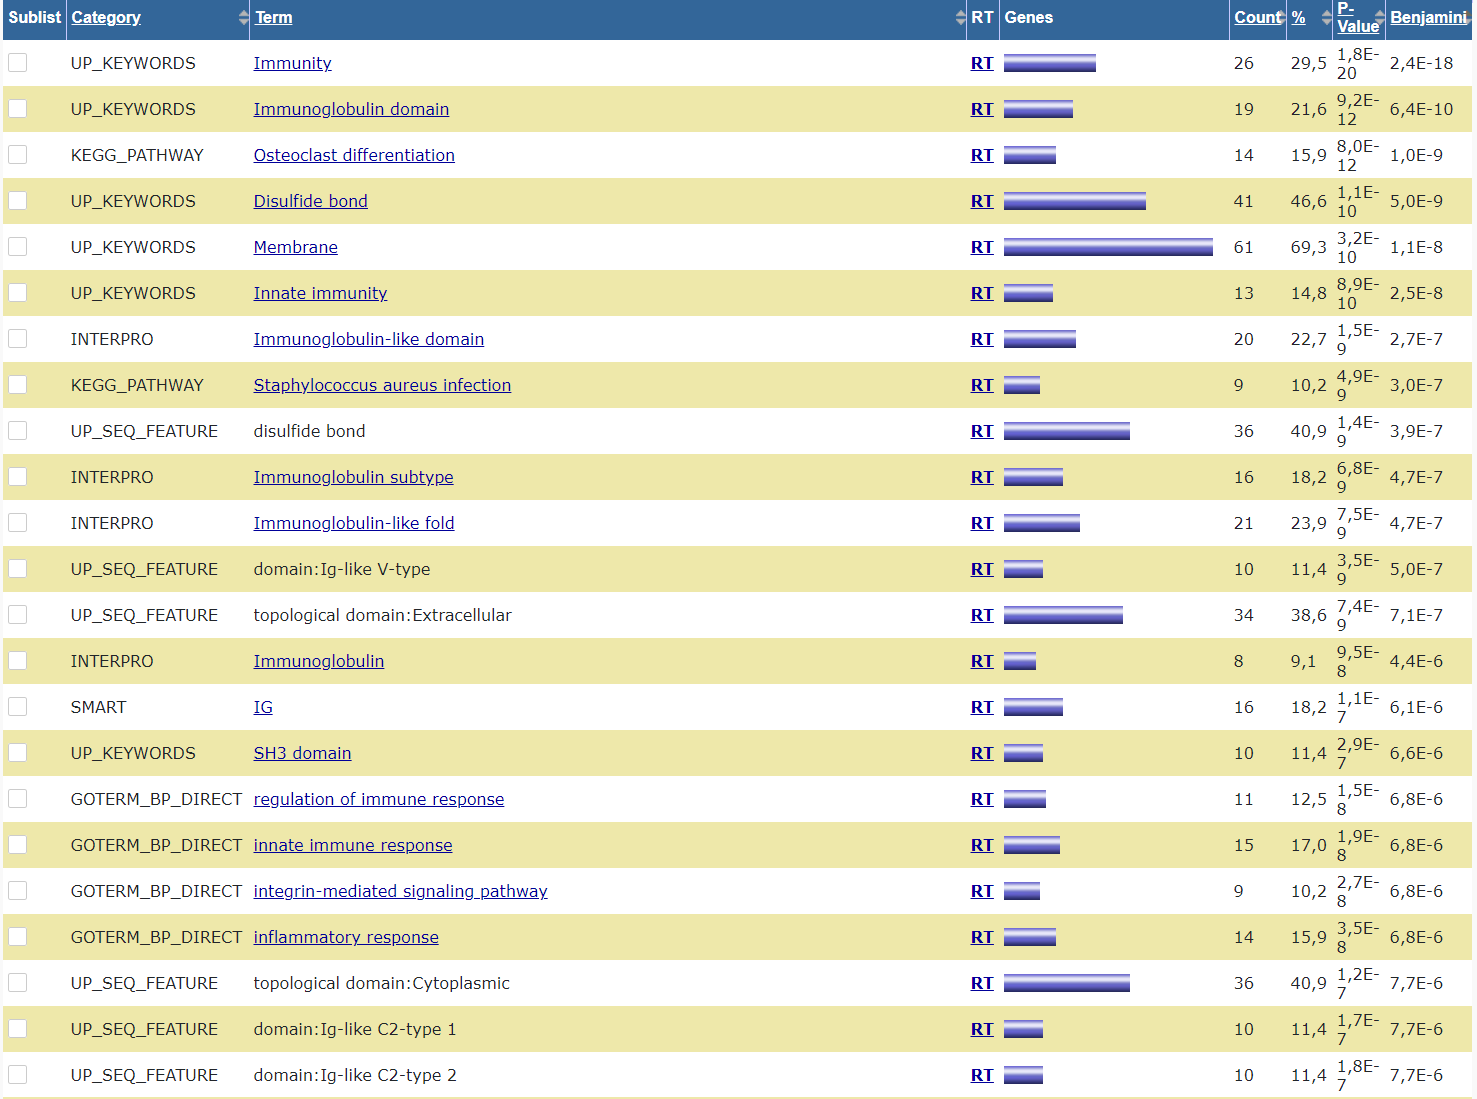

In [169]:
from IPython.display import Image
Image(filename='imm.png') 

Этот фактор транскрипции, скорее всего, связан с иммунным ответом и процессом воспаления, поскольку его экспрессия коррелирует с экспрессией белков, участвующих в этих процессах.

### Problem 4

In [170]:
brca = pd.read_csv('BRCA_pam50.tsv', index_col = 0, sep = '\t')

In [172]:
brca.head(3)

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SB-01A,2.507502,2.172270,0.952906,1.683162,3.108067,3.332448,2.982268,1.613604,1.641565,1.218495,...,0.926850,2.869065,3.896839,1.387963,1.141875,0.544443,2.942855,0.875017,5.014075,Normal-like
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A


In [173]:
brca.shape

(915, 51)

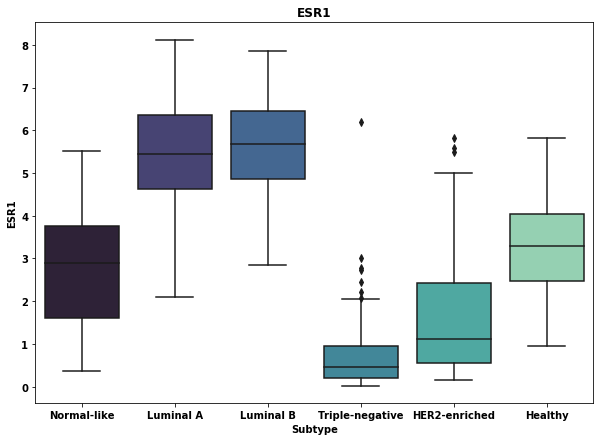

In [182]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = 'Subtype', y = 'ESR1', data = brca, palette="mako")
ax.set_title('ESR1')
plt.show()

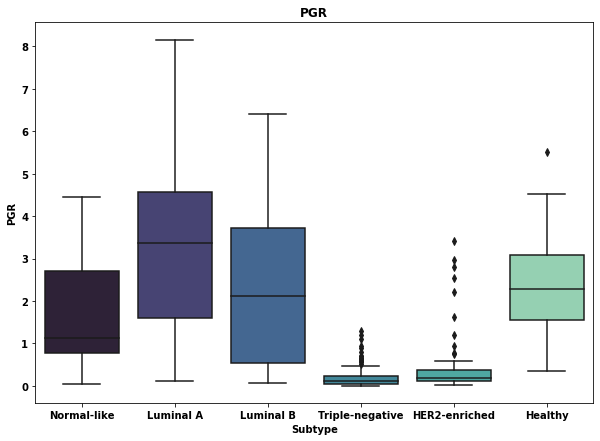

In [184]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = 'Subtype', y = 'PGR', data = brca, palette="mako")
ax.set_title('PGR')
plt.show()

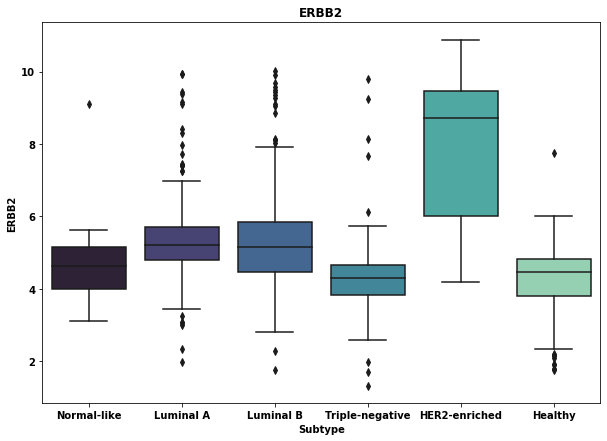

In [185]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = 'Subtype', y = 'ERBB2', data = brca, palette="mako")
ax.set_title('ERBB2')
plt.show()

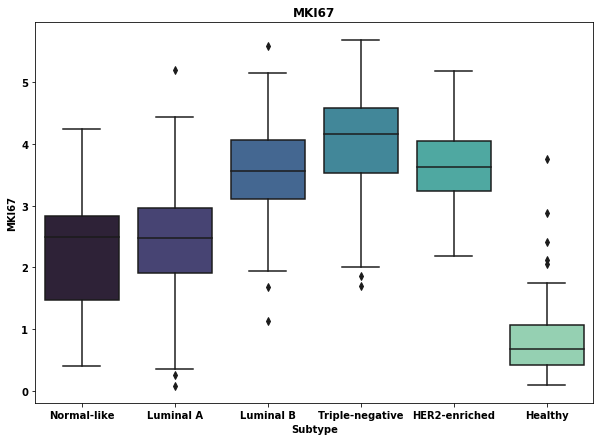

In [186]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = 'Subtype', y = 'MKI67', data = brca, palette="mako")
ax.set_title('MKI67')
plt.show()

In [190]:
new_df = brca[['ESR1', 'PGR', 'ERBB2', 'MKI67', 'Subtype']]

In [194]:
new = pd.melt(new_df, id_vars=['Subtype'])

In [195]:
new

,Subtype,variable,value
0,Normal-like,ESR1,2.021223
1,Luminal A,ESR1,5.222817
2,Luminal A,ESR1,4.191467
3,Luminal A,ESR1,4.821377
4,Luminal A,ESR1,6.017923
...,...,...,...
3655,Healthy,MKI67,1.752054
3656,Healthy,MKI67,0.999218
3657,Healthy,MKI67,0.812024
3658,Healthy,MKI67,0.375275


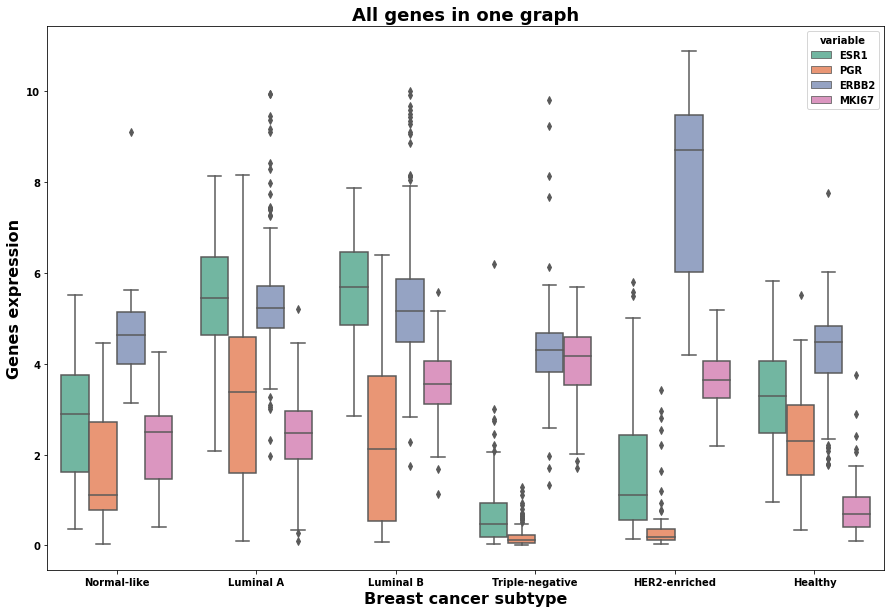

In [203]:
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x = 'Subtype', y = 'value', data = new, palette="Set2", hue = 'variable')
ax.set_title('All genes in one graph', fontsize = 18)
ax.set_xlabel("Breast cancer subtype", fontsize=16)
ax.set_ylabel("Genes expression", fontsize=16)
plt.show()

- Normal-like: экспрессируются на примерно одинаковом уровне все гены, самая высокая экспрессия у гена ERBB2. По сравнению со здоровой группой повышена экспрессия MKI67.
- Luminal A: экспрессия всех генов на высоком уровне, при этом ESR1 и ERBB2 экспрессируются в среднем больше чем PGR и MKI67.
- Luminal B: паттерны экспрессии схожи с Luminal A, однако более высокий уровень экспрессии MKI67 и более низкий PGR.
- Triple-negative: сильно понижена экспрессия генов ESR1 и PGR, экспрессия генов ERBB2 и MKI67 примерно на одном уровне.
- HER2-enriched: очень высокая экспрессия ERBB2, повышена экспрессия (как и во всех образцах кроме здорового) гена MKI67. Сильно понижена экспрессия гена PGR и в среднем понижена экспрессия ESR1.
- Healthy: экспрессия ESR1, PGR, ERBB2 в среднем на уровне 2-4 и экспрессия MKI67 значительно понижена.

### Problem 5

In [204]:
sars = pd.read_csv('human_coronavirus_aln_scores.tsv', index_col = 0, sep = '\t')

In [205]:
sars.head(3)

,NC_006577.2,MK167038.1,MH940245.1,KT779555.1,KT779556.1,KF686340.1,KF686341.1,KF686342.1,KF686343.1,KF686344.1,...,KF514391.1,KF514392.1,KF514393.1,KF514394.1,KF514395.1,KF514396.1,KF514397.1,KF514398.1,KF514399.1,KF514400.1
NC_006577.2,5000.0,4480.0,4462.0,4946.0,4946.0,4645.0,4648.0,4648.0,4654.0,4789.0,...,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0
MK167038.1,4480.0,5000.0,4964.0,4480.0,4480.0,4458.0,4461.0,4461.0,4467.0,4323.0,...,986.5,986.5,986.5,986.5,986.5,986.5,986.5,986.5,986.5,986.5
MH940245.1,4462.0,4964.0,5000.0,4462.0,4462.0,4440.0,4443.0,4443.0,4449.0,4305.0,...,976.5,976.5,976.5,976.5,976.5,976.5,976.5,976.5,976.5,976.5


In [207]:
df = np.array(sars)
df_new = 1 - df/df.max()
# чем больше score, тем меньше будет расстояние

In [221]:
df_new = pd.DataFrame(df_new, columns = sars.columns)

In [223]:
df_new.head(3)

,NC_006577.2,MK167038.1,MH940245.1,KT779555.1,KT779556.1,KF686340.1,KF686341.1,KF686342.1,KF686343.1,KF686344.1,...,KF514391.1,KF514392.1,KF514393.1,KF514394.1,KF514395.1,KF514396.1,KF514397.1,KF514398.1,KF514399.1,KF514400.1
0,0.0000,0.1040,0.1076,0.0108,0.0108,0.0710,0.0704,0.0704,0.0692,0.0422,...,0.7908,0.7908,0.7908,0.7908,0.7908,0.7908,0.7908,0.7908,0.7908,0.7908
1,0.1040,0.0000,0.0072,0.1040,0.1040,0.1084,0.1078,0.1078,0.1066,0.1354,...,0.8027,0.8027,0.8027,0.8027,0.8027,0.8027,0.8027,0.8027,0.8027,0.8027
2,0.1076,0.0072,0.0000,0.1076,0.1076,0.1120,0.1114,0.1114,0.1102,0.1390,...,0.8047,0.8047,0.8047,0.8047,0.8047,0.8047,0.8047,0.8047,0.8047,0.8047


In [226]:
model = TSNE
ds = TSNE(n_components = 2, perplexity = 30, metric = 'precomputed').fit_transform(df_new) #default perplexity = 30

In [233]:
ds = pd.DataFrame(ds, columns = ['TSNE1', 'TSNE2'])
ds

,TSNE1,TSNE2
0,3.790834,1.332733
1,3.841754,2.046993
2,3.830804,2.061423
3,3.755613,1.339307
4,3.755787,1.338948
...,...,...
135,15.924245,-7.770581
136,15.926129,-7.776043
137,15.924245,-7.770581
138,15.595183,-7.657251


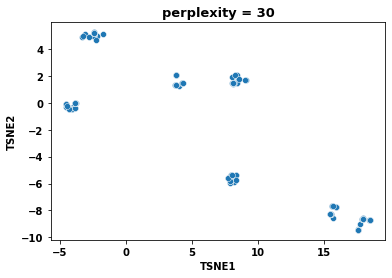

In [235]:
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = ds)
ax.set_title('perplexity = 30', fontsize = 13)
plt.show()
# видно 7 кластеров

In [236]:
ds20 = pd.DataFrame(TSNE(n_components = 2, perplexity = 20, metric = 'precomputed').fit_transform(df_new), columns = ['TSNE1', 'TSNE2']) # perplexity = 20

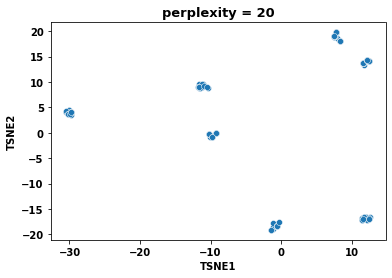

In [237]:
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = ds20)
ax.set_title('perplexity = 20', fontsize = 13)
plt.show()
# тоже видно 7 кластеров

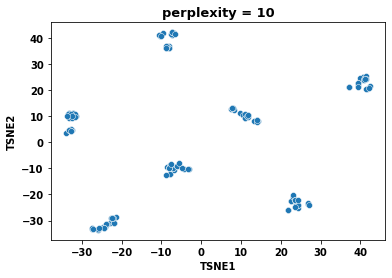

In [238]:
ds10 = pd.DataFrame(TSNE(n_components = 2, perplexity = 10, metric = 'precomputed').fit_transform(df_new), columns = ['TSNE1', 'TSNE2']) # perplexity = 10
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = ds10)
ax.set_title('perplexity = 10', fontsize = 13)
plt.show()
# тоже видно 7 кластеров, но они более дробные

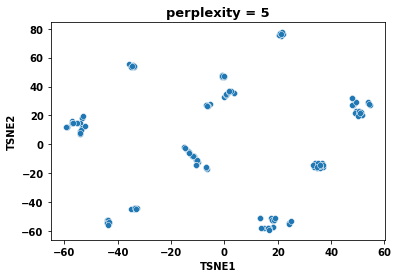

In [241]:
ds5 = pd.DataFrame(TSNE(n_components = 2, perplexity = 5, metric = 'precomputed').fit_transform(df_new), columns = ['TSNE1', 'TSNE2']) # perplexity = 5
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = ds5)
ax.set_title('perplexity = 5', fontsize = 13)
plt.show()
# тут уже слишком много кластеров

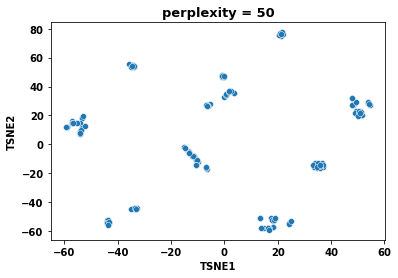

In [242]:
ds50 = pd.DataFrame(TSNE(n_components = 2, perplexity = 50, metric = 'precomputed').fit_transform(df_new), columns = ['TSNE1', 'TSNE2']) # perplexity = 50
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', data = ds5)
ax.set_title('perplexity = 50', fontsize = 13)
plt.show()
# тут много кластеров